In [21]:
from numpy import array

ket0 = array([1, 0])
ket1 = array([0, 1])

display(ket0/2 + ket1/2)

array([0.5, 0.5])

In [22]:
M1 = array([ [1, 1], [0, 0] ])
M2 = array([ [1, 1], [1, 0] ])

M1/2 + M2/2

array([[1. , 1. ],
       [0.5, 0. ]])

In [23]:
from numpy import matmul

display(matmul(M1,ket1))
display(matmul(M1,M2))
display(matmul(M2,M1))

array([1, 0])

array([[2, 1],
       [0, 0]])

array([[1, 1],
       [1, 1]])

In [24]:
from qiskit.quantum_info import Statevector
from numpy import sqrt

u = Statevector([1/sqrt(2), 1/sqrt(2)])
v = Statevector([(1+2.j)/3, -2/3])
w = Statevector([1/3, 2/3])

print("State vectors u, v, and w have been defined.")

State vectors u, v, and w have been defined.


In [25]:
display(u.draw('latex'))
display(v.draw('text'))

<IPython.core.display.Latex object>

[ 0.33333333+0.66666667j,-0.66666667+0.j        ]

In [26]:
display(u.is_valid())
display(v.is_valid())
display(w.is_valid())

True

True

False

In [27]:
v = Statevector([(1+2.j)/3, -2/3])
v.draw('latex')

<IPython.core.display.Latex object>

In [28]:
v.measure()


('1',
 Statevector([ 0.+0.j, -1.+0.j],
             dims=(2,)))

In [29]:
from qiskit.quantum_info import Operator

X = Operator([ [0,1],[1,0] ])
Y = Operator([ [0,-1.j],[1.j,0] ])
Z = Operator([ [1,0],[0,-1] ])
H = Operator([ [1/sqrt(2),1/sqrt(2)],[1/sqrt(2),-1/sqrt(2)] ])
S = Operator([ [1,0],[0,1.j] ])
T = Operator([ [1,0],[0,(1+1.j)/sqrt(2)] ])

v = Statevector([1,0])

v = v.evolve(H)
v = v.evolve(T)
v = v.evolve(H)
v = v.evolve(T)
v = v.evolve(Z)

v.draw('latex')

<IPython.core.display.Latex object>

In [30]:
from qiskit import QuantumCircuit

circuit = QuantumCircuit(1)

circuit.h(0)
circuit.t(0)
circuit.h(0)
circuit.t(0)
circuit.z(0)

circuit.draw()

┌───┐┌───┐┌───┐┌───┐┌───┐
q: ┤ H ├┤ T ├┤ H ├┤ T ├┤ Z ├
   └───┘└───┘└───┘└───┘└───┘

In [31]:
ket0 = Statevector([1,0])
v = ket0.evolve(circuit)
v.draw('latex')

<IPython.core.display.Latex object>

In [32]:
v.measure()

('0',
 Statevector([0.92387953+0.38268343j, 0.        +0.j        ],
             dims=(2,)))

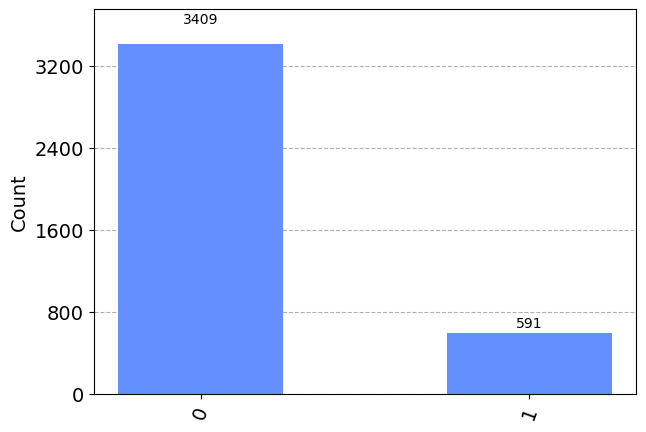

In [33]:
from qiskit.visualization import plot_histogram

statistics = v.sample_counts(4000)
plot_histogram(statistics)

# MULTIPLE SYSTEMS 
## CODE EXAMPLES:


In [34]:
from qiskit.quantum_info import Statevector, Operator

In [35]:
zero, one = Statevector.from_label('0'), Statevector.from_label('1')
zero.tensor(one).draw('latex')  # returns new `Statevector`(|0⟩⊗|1⟩)

<IPython.core.display.Latex object>

In [36]:
from numpy import sqrt
plus = Statevector.from_label('+')
i_state = Statevector([1/sqrt(2), 1j/sqrt(2)])

psi = plus.tensor(i_state)
psi.draw('latex')

<IPython.core.display.Latex object>

In [37]:
# The Operator class also has a tensor method. 
# In the example below, we create the and gates and display their tensor product.

X = Operator([ [0, 1],
              [1, 0] ])

I = Operator([ [1, 0],
              [0, 1] ])

X.tensor(I)

Operator([[0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
          [1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))

In [38]:
# We can then treat these compound states and operations as we did single systems in the previous page. 
# For example, in the cell below we use the state psi we defined above, and calculate .
# Note: You can also use the ^ operator to tensor two operators together.

psi.evolve( I ^ X ).draw('latex')

<IPython.core.display.Latex object>

In [39]:
# Below, we create a CNOT operator and calculate CNOT|PSI>.

CNOT = Operator([ [1, 0, 0, 0],
                 [0, 1, 0, 0],
                 [0, 0, 0, 1],
                 [0, 0, 1, 0] ])

psi.evolve(CNOT).draw('latex')

<IPython.core.display.Latex object>

## CHALLENGE:
cAN YOU CREATE EACH OF THE BELL STATES USING ONLY SINGLE-QUBIT STATE VECTORS AND THE CNOT OPERATOR?

In [40]:
n1 = Statevector.from_label('+').tensor(Statevector.from_label('0'))
CNOT = Operator([ [1, 0, 0, 0],
                 [0, 1, 0, 0],
                 [0, 0, 0, 1],
                 [0, 0, 1, 0] ])
print('Bell state: phi+')
n1.draw('latex')
# n1.draw('latex')
## n1.evolve(CNOT).draw('latex')

Bell state: phi+


<IPython.core.display.Latex object>

In [41]:
n1 = Statevector.from_label('-').tensor(Statevector.from_label('0'))
CNOT = Operator([ [1, 0, 0, 0],
                 [0, 1, 0, 0],
                 [0, 0, 0, 1],
                 [0, 0, 1, 0] ])
print('Bell state: phi-')
n1.evolve(CNOT).draw('latex')

Bell state: phi-


<IPython.core.display.Latex object>

In [42]:
n1 = Statevector.from_label('+').tensor(Statevector.from_label('1'))
CNOT = Operator([ [1, 0, 0, 0],
                 [0, 1, 0, 0],
                 [0, 0, 0, 1],
                 [0, 0, 1, 0] ])
print('Bell state: psi+')
n1.evolve(CNOT).draw('latex')

Bell state: psi+


<IPython.core.display.Latex object>

In [43]:
n1 = Statevector.from_label('-').tensor(Statevector.from_label('1'))
CNOT = Operator([ [1, 0, 0, 0],
                 [0, 1, 0, 0],
                 [0, 0, 0, 1],
                 [0, 0, 1, 0] ])
print('Bell state: psi-')
n1.evolve(CNOT).draw('latex')

Bell state: psi-


<IPython.core.display.Latex object>

## Partial measurements:

In [44]:
from numpy import sqrt
W = Statevector([0, 1, 1, 0, 1, 0, 0, 0]/sqrt(3))
W.draw('latex')

<IPython.core.display.Latex object>

In [46]:
#The cell below simulates a measurement on the rightmost qubit 
# (which has index 0). The other two qubits are not measured.
result, new_sv = W.measure([0,1])  # measure qubit 0
print(f'Measured: {result}\nState after measurement:')
new_sv.draw('latex')

Measured: 01
State after measurement:


<IPython.core.display.Latex object>

## EXPLORE
Say you applied an H-gate to the rightmost qubit of the W-state before measuring it. What would the probabilities of the two outcomes be? 
And what would the resulting state of the other qubits be for each of these outcomes?

In [27]:
H = Operator([[1/sqrt(2), 1/sqrt(2)],
             [1/sqrt(2), -1/sqrt(2)]])
Unit = Operator.from_label('I')

X = W.evolve(Unit^Unit^H)

X.draw('latex')

<IPython.core.display.Latex object>

In [28]:
result, new_sv = X.measure([0])  # measure qubit 0
print(f'Measured: {result}\nState after measurement:')
new_sv.draw('latex')

Measured: 0
State after measurement:


<IPython.core.display.Latex object>

In [29]:
import qiskit.tools.jupyter
%qiskit_version_table

# Quantum Circuits
Here is how we can specify this circuit in Qiskit:

In [30]:
from qiskit import QuantumCircuit
circuit = QuantumCircuit(1)
circuit.h(0)
circuit.s(0)
circuit.h(0)
circuit.t(0)
circuit.draw()

┌───┐┌───┐┌───┐┌───┐
q: ┤ H ├┤ S ├┤ H ├┤ T ├
   └───┘└───┘└───┘└───┘

In [31]:
from qiskit import QuantumCircuit, QuantumRegister
X = QuantumRegister(1, "x")
circuit = QuantumCircuit(X)
circuit.h(X)
circuit.s(X)
circuit.h(X)
circuit.t(X)
circuit.draw()

┌───┐┌───┐┌───┐┌───┐
x: ┤ H ├┤ S ├┤ H ├┤ T ├
   └───┘└───┘└───┘└───┘

In [32]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
X = QuantumRegister(1, "x")
Y = QuantumRegister(1, "y")
A = ClassicalRegister(1, "a")
B = ClassicalRegister(1, "b")
circuit = QuantumCircuit(Y, X, B, A)
circuit.h(Y)
circuit.cx(Y, X)

circuit.measure(Y, B)
circuit.measure(X, A)
circuit.draw()

┌───┐     ┌─┐   
  y: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
  x: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
b: 1/═══════════╩══╬═
                0  ║ 
a: 1/══════════════╩═
                   0

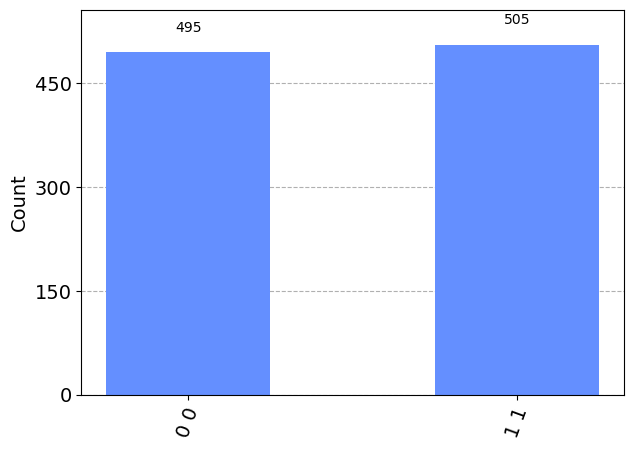

In [33]:
from qiskit import transpile
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator

simulator = AerSimulator()  
circuit_simulator = simulator.run(transpile(circuit,simulator), shots=1000)
statistics = circuit_simulator.result().get_counts()
plot_histogram(statistics)

# Quantum Entanglement

## Teleportation (send quantum through quantum)

In [34]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
qubit = QuantumRegister(1, "Q")
ebit0 = QuantumRegister(1, "A")
ebit1 = QuantumRegister(1, "B")
a = ClassicalRegister(1, "a")
b = ClassicalRegister(1, "b")

protocol = QuantumCircuit(qubit, ebit0, ebit1, a, b)

# Prepare ebit used for teleportation
protocol.h(ebit0)
protocol.cx(ebit0, ebit1)
protocol.barrier()

# Alice's operations
protocol.cx(qubit, ebit0)
protocol.h(qubit)
protocol.barrier()

# Alice measures and sends classical bits to Bob
protocol.measure(ebit0, a)
protocol.measure(qubit, b)
protocol.barrier()

# Bob uses the classical bits to conditionally apply gates
with protocol.if_test((a, 1)):
    protocol.x(ebit1)
with protocol.if_test((b, 1)):
    protocol.z(ebit1)

protocol.draw()

░      ┌───┐ ░    ┌─┐ ░                         
Q: ───────────░───■──┤ H ├─░────┤M├─░─────────────────────────
   ┌───┐      ░ ┌─┴─┐└───┘ ░ ┌─┐└╥┘ ░                         
A: ┤ H ├──■───░─┤ X ├──────░─┤M├─╫──░─────────────────────────
   └───┘┌─┴─┐ ░ └───┘      ░ └╥┘ ║  ░ ┌──────────┐┌──────────┐
B: ─────┤ X ├─░────────────░──╫──╫──░─┤0         ├┤0         ├
        └───┘ ░            ░  ║  ║  ░ │  If_else ││          │
a: ═══════════════════════════╩══╬════╡0         ╞╡          ╞
                                 ║    └──────────┘│          │
b: ══════════════════════════════╩════════════════╡0         ╞
                                                  └──────────┘

el codigo previo muestra los principios de el metodo de comunicación cuantica del *teletransporte*.

1. Alice and Bob, perform the necessary prerequisites to be at the state $|\phi^+⟩$ at the end of the the first *barrier*.
2. Then performs the necessary AQ operations for teleportation until the second *barrier*.
3. The measures are taken through to both *a* and *b* as defined in the algorithm
4. Then conditionally applied to B through the if_else gates.

In [36]:
# Create a new circuit including the same bits and qubits used in the
# teleportation protocol, along with a new "auxiliary" qubit R.
aux = QuantumRegister(1, "R")
test = QuantumCircuit(aux, qubit, ebit0, ebit1, a, b)

# Entangle Q with R
test.h(aux)
test.cx(aux, qubit)
test.barrier()

# Append the protocol the circuit. The 'qubits' argument tells Qiskit that
# the protocol should operate on the qubits numbered 1, 2, and 3 (skipping
# qubit 0, which is R).
test = test.compose(protocol, qubits=[1, 2, 3])
test.barrier()

# After the protocol runs, check that (B,R) is in a phi+ state. We can add
# a new classical bit to the circuit to do this.
test.cx(aux, ebit1)
test.h(aux)
result = ClassicalRegister(1, "Test result")
test.add_register(result)
test.measure(aux, result)

test.draw()

┌───┐      ░                                                »
          R: ┤ H ├──■───░────────────────────────────────────────────────»
             └───┘┌─┴─┐ ░            ░      ┌───┐ ░    ┌─┐ ░             »
          Q: ─────┤ X ├─░────────────░───■──┤ H ├─░────┤M├─░─────────────»
                  └───┘ ░ ┌───┐      ░ ┌─┴─┐└───┘ ░ ┌─┐└╥┘ ░             »
          A: ───────────░─┤ H ├──■───░─┤ X ├──────░─┤M├─╫──░─────────────»
                        ░ └───┘┌─┴─┐ ░ └───┘      ░ └╥┘ ║  ░ ┌──────────┐»
          B: ───────────░──────┤ X ├─░────────────░──╫──╫──░─┤0         ├»
                        ░      └───┘ ░            ░  ║  ║  ░ │  If_else │»
          a: ════════════════════════════════════════╩══╬════╡0         ╞»
                                                        ║    └──────────┘»
          b: ═══════════════════════════════════════════╩════════════════»
                                                                         »
Test result: ════════════════════════════════════════════════════════════»
                                                                         »
«                          ░      ┌───┐┌─┐
«          R: ─────────────░───■──┤ H ├┤M├
«                          ░   │  └───┘└╥┘
«          Q: ─────────────░───┼────────╫─
«                          ░   │        ║ 
«          A: ─────────────░───┼────────╫─
«             ┌──────────┐ ░ ┌─┴─┐      ║ 
«          B: ┤0         ├─░─┤ X ├──────╫─
«             │          │ ░ └───┘      ║ 
«          a: ╡          ╞══════════════╬═
«             │          │              ║ 
«          b: ╡0         ╞══════════════╬═
«             └──────────┘              ║ 
«Test result: ══════════════════════════╩═
«

Finally let's run the Aer simulator on this circuit and plot a histogram of the outputs. We'll see the statistics for all three classical bits: the bottom/leftmost bit should always be 0 , indicating that the qubit Q was successfully teleported into B, while the other two bits should be roughly uniform.

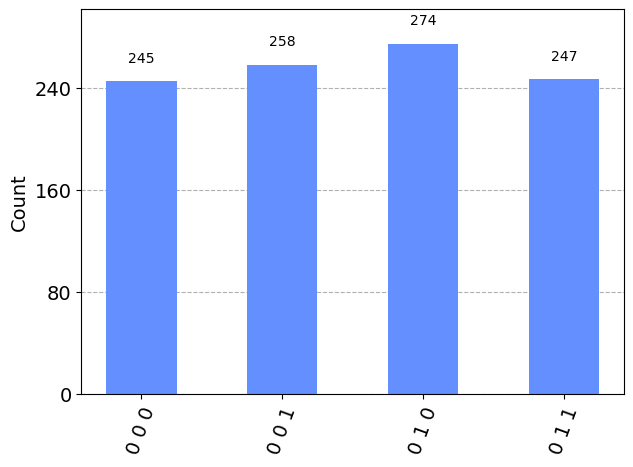

In [37]:
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

counts = AerSimulator().run(test).result().get_counts()
plot_histogram(counts)

in this order:
testresult - b - a

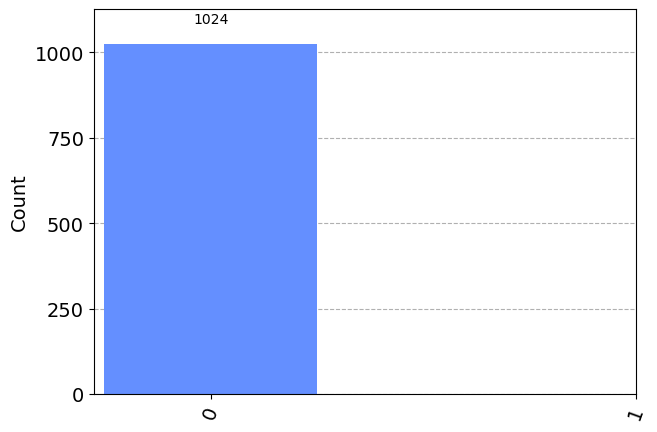

In [38]:
filtered_counts = {"0": 0, "1": 0}

for result, frequency in counts.items():
    filtered_counts[result[0] ] += frequency

plot_histogram(filtered_counts)

## Superdense Coding (send binary thorugh quantum)

In [43]:
a = "0"
b = "1"

from qiskit import QuantumCircuit

protocol = QuantumCircuit(2)

# Prepare ebit used for superdense coding
protocol.h(0)
protocol.cx(0, 1)
protocol.barrier()

# Alice's operations

if b == "1":
    protocol.z(0)
if a == "1":
    protocol.x(0)
protocol.barrier()

# Bob's actions
protocol.cx(0, 1)
protocol.h(0)
protocol.measure_all()

protocol.draw()

┌───┐      ░ ┌───┐ ░      ┌───┐ ░ ┌─┐   
   q_0: ┤ H ├──■───░─┤ Z ├─░───■──┤ H ├─░─┤M├───
        └───┘┌─┴─┐ ░ └───┘ ░ ┌─┴─┐└───┘ ░ └╥┘┌─┐
   q_1: ─────┤ X ├─░───────░─┤ X ├──────░──╫─┤M├
             └───┘ ░       ░ └───┘      ░  ║ └╥┘
meas: 2/═══════════════════════════════════╩══╩═
                                           0  1

Measured 00 with frequency 1024


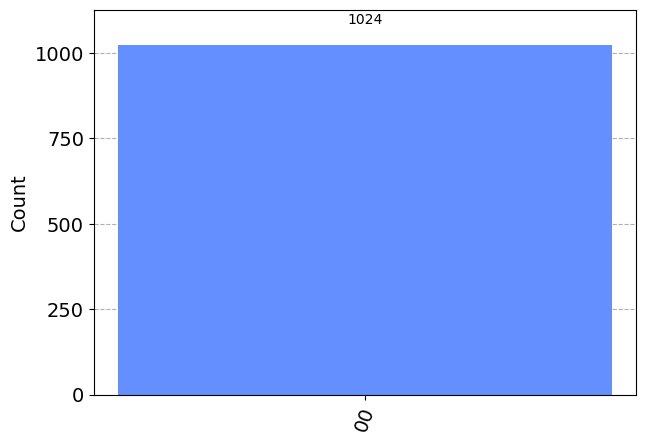

In [42]:
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

counts = AerSimulator().run(protocol).result().get_counts()
for outcome, frequency in counts.items():
    print(f"Measured {outcome} with frequency {frequency}")
plot_histogram(counts)

Just for fun, we can use an additional qubit as a random bit generator to randomly choose and , then run the superdense coding protocol to see that these bits are transmitted correctly.

In [44]:
from qiskit import QuantumCircuit

rbg = QuantumRegister(1, "randomizer")
ebit0 = QuantumRegister(1, "A")
ebit1 = QuantumRegister(1, "B")

Alice_a = ClassicalRegister(1, "Alice a")
Alice_b = ClassicalRegister(1, "Alice b")

test = QuantumCircuit(rbg, ebit0, ebit1, Alice_b, Alice_a)

# Initialize the ebit
test.h(ebit0)
test.cx(ebit0, ebit1)
test.barrier()

# Use the 'randomizer' qubit twice to generate Alice's bits a and b.
test.h(rbg)
test.measure(rbg, Alice_a)
test.h(rbg)
test.measure(rbg, Alice_b)
test.barrier()

# Now the protocol runs, starting with Alice's actions, which depend
# on her bits.
with test.if_test((Alice_b, 1), label="Z"):
    test.z(ebit0)
with test.if_test((Alice_a, 1), label="X"):
    test.x(ebit0)
test.barrier()

# Bob's actions
test.cx(ebit0, ebit1)
test.h(ebit0)
test.barrier()

Bob_a = ClassicalRegister(1, "Bob a")
Bob_b = ClassicalRegister(1, "Bob b")
test.add_register(Bob_b)
test.add_register(Bob_a)
test.measure(ebit1, Bob_a)
test.measure(ebit0, Bob_b)

test.draw()

░ ┌───┐┌─┐┌───┐┌─┐ ░              ░            ░       
randomizer: ───────────░─┤ H ├┤M├┤ H ├┤M├─░──────────────░────────────░───────
            ┌───┐      ░ └───┘└╥┘└───┘└╥┘ ░ ┌────┐┌────┐ ░      ┌───┐ ░    ┌─┐
         A: ┤ H ├──■───░───────╫───────╫──░─┤0   ├┤0   ├─░───■──┤ H ├─░────┤M├
            └───┘┌─┴─┐ ░       ║       ║  ░ │    ││    │ ░ ┌─┴─┐└───┘ ░ ┌─┐└╥┘
         B: ─────┤ X ├─░───────╫───────╫──░─┤  Z ├┤    ├─░─┤ X ├──────░─┤M├─╫─
                 └───┘ ░       ║       ║  ░ │    ││  X │ ░ └───┘      ░ └╥┘ ║ 
   Alice b: ═══════════════════╬═══════╩════╡0   ╞╡    ╞═════════════════╬══╬═
                               ║            └────┘│    │                 ║  ║ 
   Alice a: ═══════════════════╩══════════════════╡0   ╞═════════════════╬══╬═
                                                  └────┘                 ║  ║ 
     Bob b: ═════════════════════════════════════════════════════════════╬══╩═
                                                                         ║    
     Bob a: ═════════════════════════════════════════════════════════════╩════

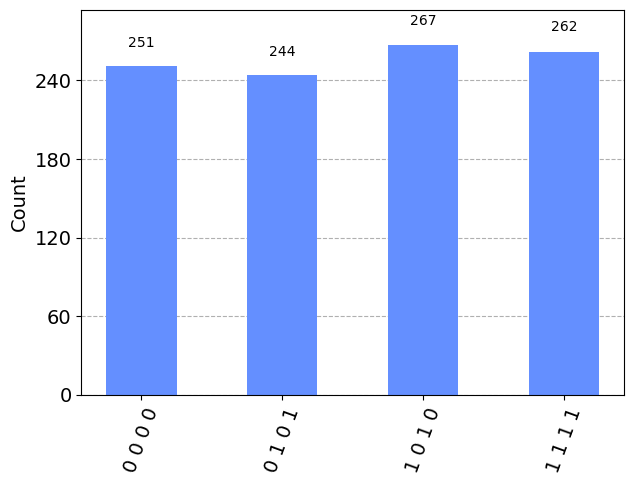

In [45]:
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

counts = AerSimulator().run(test).result().get_counts()
plot_histogram(counts)

## CHSH GAME

In [1]:
from numpy.random import randint

def chsh_game(strategy):
    """Plays the CHSH game
    Args:
        strategy (callable): A function that takes two bits (as `int`s) and
            returns two bits (also as `int`s). The strategy must follow the
            rules of the CHSH game.
    Returns:
        int: 1 for a win, 0 for a loss.
    """
    # Referee chooses x and y randomly
    x, y = randint(0, 2), randint(0, 2)

    # Use strategy to choose a and b
    a, b = strategy(x, y)

    # Referee decides if Alice and Bob win or lose
    if (a != b) == (x & y):
        return 1  # Win
    return 0  # Lose

In [2]:
from qiskit import QuantumCircuit
from numpy import pi

def chsh_circuit(x, y):
    """Creates a `QuantumCircuit` that implements the best CHSH strategy.
    Args:
        x (int): Alice's bit (must be 0 or 1)
        y (int): Bob's bit (must be 0 or 1)
    Returns:
        QuantumCircuit: Circuit that, when run, returns Alice and Bob's
            answer bits.
    """
    qc = QuantumCircuit(2, 2)
    qc.h(0)
    qc.cx(0, 1)
    qc.barrier()

    # Alice
    if x == 0:
        qc.ry(0, 0)
    else:
        qc.ry(-pi / 2, 0)
    qc.measure(0, 0)

    # Bob
    if y == 0:
        qc.ry(-pi / 4, 1)
    else:
        qc.ry(pi / 4, 1)
    qc.measure(1, 1)

    return qc

In [3]:

# Draw the four possible circuits

print("(x,y) = (0,0)")
display(chsh_circuit(0, 0).draw())

print("(x,y) = (0,1)")
display(chsh_circuit(0, 1).draw())

print("(x,y) = (1,0)")
display(chsh_circuit(1, 0).draw())

print("(x,y) = (1,1)")
display(chsh_circuit(1, 1).draw())

(x,y) = (0,0)


┌───┐      ░  ┌───────┐  ┌─┐   
q_0: ┤ H ├──■───░──┤ Ry(0) ├──┤M├───
     └───┘┌─┴─┐ ░ ┌┴───────┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─░─┤ Ry(-π/4) ├─╫─┤M├
          └───┘ ░ └──────────┘ ║ └╥┘
c: 2/══════════════════════════╩══╩═
                               0  1

(x,y) = (0,1)


┌───┐      ░  ┌───────┐ ┌─┐   
q_0: ┤ H ├──■───░──┤ Ry(0) ├─┤M├───
     └───┘┌─┴─┐ ░ ┌┴───────┴┐└╥┘┌─┐
q_1: ─────┤ X ├─░─┤ Ry(π/4) ├─╫─┤M├
          └───┘ ░ └─────────┘ ║ └╥┘
c: 2/═════════════════════════╩══╩═
                              0  1

(x,y) = (1,0)


┌───┐      ░ ┌──────────┐┌─┐   
q_0: ┤ H ├──■───░─┤ Ry(-π/2) ├┤M├───
     └───┘┌─┴─┐ ░ ├──────────┤└╥┘┌─┐
q_1: ─────┤ X ├─░─┤ Ry(-π/4) ├─╫─┤M├
          └───┘ ░ └──────────┘ ║ └╥┘
c: 2/══════════════════════════╩══╩═
                               0  1

(x,y) = (1,1)


┌───┐      ░ ┌──────────┐┌─┐   
q_0: ┤ H ├──■───░─┤ Ry(-π/2) ├┤M├───
     └───┘┌─┴─┐ ░ ├─────────┬┘└╥┘┌─┐
q_1: ─────┤ X ├─░─┤ Ry(π/4) ├──╫─┤M├
          └───┘ ░ └─────────┘  ║ └╥┘
c: 2/══════════════════════════╩══╩═
                               0  1

In [4]:
from qiskit_aer import AerSimulator

simulator = AerSimulator()


def quantum_strategy(x, y):
    """Carry out the best strategy for the CHSH game.
    Args:
        x (int): Alice's bit (must be 0 or 1)
        y (int): Bob's bit (must be 0 or 1)
    Returns:
        (int, int): Alice and Bob's answer bits (respectively)
    """
    # `shots=1` runs the circuit once
    # `memory=True` enables the `.get_memory()` method
    job = simulator.run(chsh_circuit(x, y), shots=1, memory=True)
    result = job.result().get_memory()[0]
    a, b = result[0], result[1]
    return a, b

In [7]:
NUM_GAMES = 1000
TOTAL_SCORE = 0

for _ in range(NUM_GAMES):
    TOTAL_SCORE += chsh_game(quantum_strategy)

print("Fraction of games won:", TOTAL_SCORE / NUM_GAMES)

Fraction of games won: 0.866


Classical startegy definition...

In [8]:
def classical_strategy(x, y):
    """The best classical strategy for the CHSH game
    Args:
        x (int): Alice's bit (must be 0 or 1)
        y (int): Bob's bit (must be 0 or 1)
    Returns:
        (int, int): Alice and Bob's answer bits (respectively)
    """
    # Alice's answer
    if x == 0:
        a = 0
    elif x == 1:
        a = 1

    # Bob's answer
    if y == 0:
        b = 1
    elif y == 1:
        b = 0

    return a, b

In [15]:
NUM_GAMES = 1000
TOTAL_SCORE = 0

for _ in range(NUM_GAMES):
    TOTAL_SCORE += chsh_game(classical_strategy)

print("Fraction of games won:", TOTAL_SCORE / NUM_GAMES)

Fraction of games won: 0.762
